In [3]:
import os, random, cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
path = "/Users/Karlsson/Documents/Skola/Handwriting_Recognition/monkbrill_171005/"

In [5]:
def get_letter(letter):
    file = random.choice(os.listdir(path+letter))
    img = np.double(cv2.imread(path+letter+"/"+file,0))
    img_cutout = cut_out_image(img)
    return img_cutout

In [83]:
def binarize(img):
    treshold = 100
    
    img[img<=treshold] = 1
    img[img>treshold] = 0
    return img.astype(np.uint8)

In [113]:
def cut_out_image(img):
    
    binarized_image = binarize(img)
    # You need to choose 4 or 8 for connectivity type
    connectivity = 8  
    # Perform the operation
    output = cv2.connectedComponentsWithStats(binarized_image, connectivity, cv2.CV_32S)
    # centroid matrix
    centroids = output[3]
    # The first cell is the number of labels
    num_labels = output[0]
    # The second cell is the label matrix
    labels = output[1]
    # The third cell is the stat matrix
    stats = output[2]
    # Biggest component
    biggest_component = np.argmax(stats[1:,cv2.CC_STAT_AREA])+1
    # Bounding box of biggest component
    left,top,width,height = stats[biggest_component,0:4]
    
    # Cut out from original image
    img*= (labels == biggest_component)
    new_img = img[top:top+height,left:left+width]
    
    new_centroid = centroids[biggest_component,:]-np.array([left,top])
    
    return new_img, new_centroid

In [118]:
def combine_letters(list_of_letters):
    
    n_letters = len(list_of_letters)
    letters = []
    centroids = []
    
    total_width = 0
    max_height = 0
    max_centroid = 0
    
    for letter in list_of_letters:
        img, centroid = get_letter(letter)
        height, width = np.shape(img)
        total_width += width
        if (height > max_height):
            max_height = height
        
        if(centroid[1] > max_centroid):
            max_centroid = centroid[1]
        
        letters += [img]
        centroids += [centroid]
     
    combined_image = np.zeros([max_height*2,total_width])
    
    current_x = 0
    max_h = 0
    for i in range(n_letters):
        img = letters[i]
        height,width = np.shape(img)
        height_offset = int(max_centroid-centroids[i][1])
        combined_image[height_offset:height_offset+height,current_x:current_x+width] = img
        current_x += width
        
        if(height_offset+height > max_h):
            max_h = height_offset+height
        

    return combined_image[:max_h,:]

## Load random image of given letter

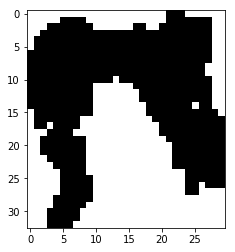

In [9]:
img, centroid = get_letter("Het")
plt.imshow(img,cmap="binary")

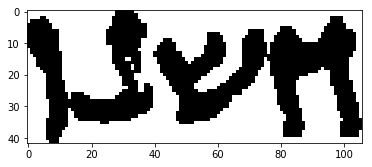

In [122]:
img = combine_letters(['Nun-final',"Nun-medial","Shin","Het"])
plt.imshow(img,cmap="binary")

In [82]:
np.max(img)

100.0

In [72]:
np.max(img)


100.0

IndexError: index 2 is out of bounds for axis 0 with size 1

In [64]:
a*(a>.5)

array([[ 0.       ,  0.7345265,  0.       ,  0.       ,  0.7326643]])